Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Creating Plots

Log-log plot

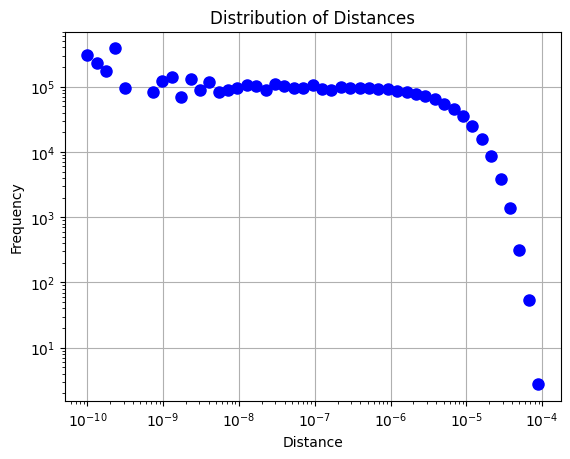

In [4]:
# Function to generate the distribution of distances
def generate_distance_distribution(N, L):
    events = np.random.rand(N) * L  # Generate random events between 0 and L
    events = np.sort(events)  # Sort the events in ascending order
    distances = np.diff(events)  # Compute the distances between successive events
    return distances

# Parameters
N = 100000  # Number of events
L = 1  # Length of the interval

# Generate the distance distribution
distances = generate_distance_distribution(N, L)

# Compute the frequency of distances
bin_edges = np.logspace(np.log10(min(distances)), np.log10(max(distances)), num=50)
hist, _ = np.histogram(distances, bins=bin_edges, density=True)

# Plot the log-log plot of the distribution
plt.loglog(bin_edges[:-1], hist, 'bo', markersize=8)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
plt.grid(True)
plt.show()


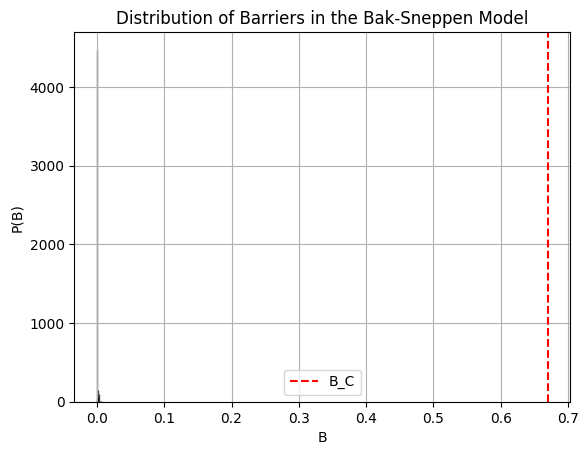

In [5]:
def bak_sneppen_simulation(B_C, num_simulations, num_iterations):
    barriers = []
    
    for _ in range(num_simulations):
        B = B_C
        for _ in range(num_iterations):
            B = np.random.random()  # Randomly update B in each iteration
            if B < B_C:
                B_C = B  # Update the self-organized threshold
            
        barriers.append(B_C)
    
    return barriers

# Parameters
B_C = 0.67
B_C_error = 0.01
num_simulations = 1000
num_iterations = 100

# Generate barriers
barriers = bak_sneppen_simulation(B_C, num_simulations, num_iterations)

# Plotting
plt.hist(barriers, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.axvline(x=B_C, color='r', linestyle='--', label='B_C')
plt.xlabel('B')
plt.ylabel('P(B)')
plt.title('Distribution of Barriers in the Bak-Sneppen Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def bak_sneppen(N, iterations):
    species = np.random.rand(N)  # Initial species array
    fitness = np.random.rand(N)  # Initial fitness array

    for _ in range(iterations):
        min_index = np.argmin(fitness)  # Index of the species with the minimum fitness
        fitness[min_index] = np.random.rand()  # Update the fitness of the selected species
        species[min_index] = np.random.rand()  # Update the selected species

        # Update the neighbors of the selected species
        if min_index > 0:
            fitness[min_index - 1] = np.random.rand()
            species[min_index - 1] = np.random.rand()
        if min_index < N - 1:
            fitness[min_index + 1] = np.random.rand()
            species[min_index + 1] = np.random.rand()

        # Plotting the species and fitness arrays
        plt.subplot(2, 1, 1)
        plt.cla()
        plt.plot(species, 'b-')
        plt.xlabel('Species')
        plt.ylabel('Value')
        plt.title('Species Distribution')

        plt.subplot(2, 1, 2)
        plt.cla()
        plt.plot(fitness, 'r-')
        plt.xlabel('Species')
        plt.ylabel('Fitness')
        plt.title('Fitness Distribution')

        plt.tight_layout()
        plt.pause(0.01)

    plt.show()

# Example usage
N = 10  # Number of species
iterations = 10  # Number of iterations

bak_sneppen(N, iterations)
